**ExplainerDashboard** built by Oege Dijk is a an extensive and engaging interactive dashboard library to explain ML models across various spectrums and methodologies. This is a lot more detailed compared to Shapash, i.e. not limited to just SHAP or Lime.


![N|Solid](https://explainerdashboard.readthedocs.io/en/latest/_images/screenshot.png)



This dashboard covers various aspects of ML explainability such as :
- Feature importance
- Metrics and evaluation
- Local prediction explainability
- What if analysis
- Decision trees
- Feature dependencies
- Interactions

While this package has many visualizations and outputs. This dashboard can get a bit overwhelming with the various components however it is modular and allows great flexibility and customization on creating your own preferred version of the dashboard. There are also inline explainers to look at individual components. Some examples of visuals are given below followed by the code.


More information can be found in [https://medium.com/value-stream-design/making-ml-transparent-and-explainable-with-explainerdashboard-49953ae743dd](https://medium.com/value-stream-design/making-ml-transparent-and-explainable-with-explainerdashboard-49953ae743dd)

# Import libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
# Built-in libraries
import math
import numpy    as np
import pandas   as pd


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn           as sns

# Sklearn libraries
#
from sklearn                 import metrics
from sklearn                 import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets        import load_breast_cancer

# Parameters

In [3]:
test_size = 0.1

# Import data

**Breast cancer wisconsin (diagnostic) dataset**
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign




This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.


**References**

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

## Loading data

In [4]:
# Load Breast Cancer dataset
data = load_breast_cancer() 

# Create DataFrame
#
df   = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column
#
df['class'] = data.target


# Show DataFrame
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## Pre-processing data

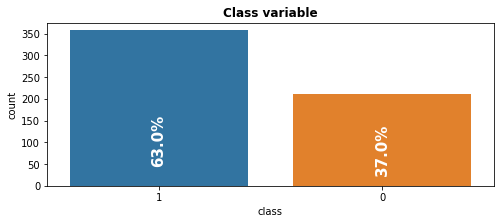

In [5]:
fig = plt.figure(figsize=(8,3))
ax  = sns.countplot(df['class'], order = df['class'].value_counts().index)

#Create annotate
for i in ax.patches:
    ax.text(x        = i.get_x() + i.get_width()/2, 
            y        = i.get_height()/7, 
            s        = f"{np.round(i.get_height()/len(df)*100)}%", 
            ha       = 'center', 
            size     = 15, 
            weight   = 'bold', 
            rotation = 90, 
            color    = 'white');
    

plt.title("Class variable", size=12, weight='bold');

### Training/Testing sets

In [6]:
X = df.iloc[:,:-1]
Y = df.iloc[:, -1]

trainX, testX, trainY, testY = train_test_split(X, Y, test_size=test_size, random_state=42) 

# Model development

# Setup ML model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost model
#
model = GradientBoostingClassifier( random_state  = 42 )

## Training ML model

In [8]:
model.fit(trainX, trainY);

## Get Predictions


In [9]:
# Calculate prediction
#
pred = model.predict( testX )

# Performance accuracy
#
accuracy = metrics.accuracy_score(testY, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.49%


# ExplainableDashboard

In [10]:
%%capture
! pip install explainerdashboard

In [11]:
# import datatable as dt # data table factory

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import explainerdashboard        as expdb
from   explainerdashboard        import ClassifierExplainer
from   explainerdashboard        import ExplainerDashboard
from   explainerdashboard        import InlineExplainer
from   explainerdashboard.custom import ImportancesComposite
from   explainerdashboard.custom import IndividualPredictionsComposite
from   explainerdashboard.custom import WhatIfComposite
from   explainerdashboard.custom import ShapDependenceComposite
from   explainerdashboard.custom import ShapInteractionsComposite
from   explainerdashboard.custom import DecisionTreesComposite

## Create explainer

In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
explainer = ClassifierExplainer(model, testX, testY, model_output='logodds')

ExplainerDashboard(explainer, 
                  #  importances=True,
                  #  model_summary=True,  # you can switch off individual tabs
                  #  contributions=True,
                  #  shap_dependence=True,
                  #  shap_interaction=False,
                  #  decision_trees=False,
                   mode='external').run(8051)


Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.j

<IPython.core.display.Javascript object>

## Explainability/Visualizations

### Create individual component plants using Inexplainer

In [15]:
# Create individual component plants using Inexplainer
#
ie = InlineExplainer(explainer)

### SHAP overview


In [16]:
# SHAP overview
#
ie.shap.overview()

<IPython.core.display.Javascript object>

### SHAP interactions


In [17]:
# SHAP interactions
#
ie.shap.interaction_dependence()


<IPython.core.display.Javascript object>

### Model Stats

In [18]:
# Model Stats
#
ie.classifier.model_stats()

<IPython.core.display.Javascript object>

### SHAP contribution

In [19]:
# SHAP contribution
#
ie.shap.contributions_graph()

<IPython.core.display.Javascript object>

### SHAP dependence


In [20]:
# SHAP dependence
ie.shap.dependence()

<IPython.core.display.Javascript object>